In [9]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [10]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas import plotting

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, '_style'), '_get_standard_colors')(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)])
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax

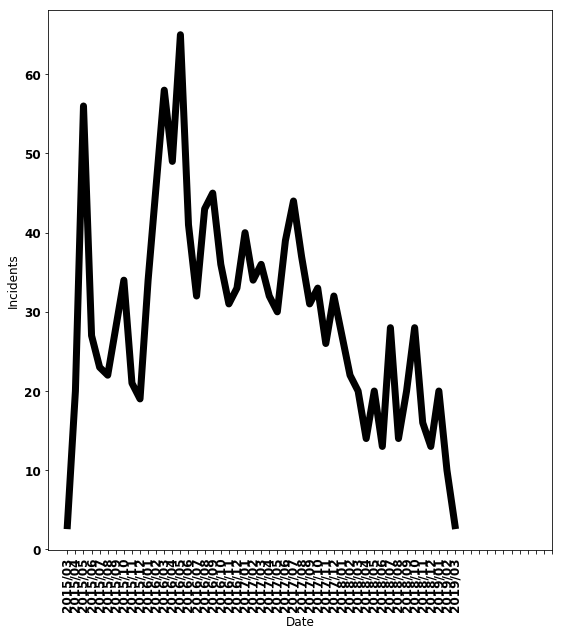

,index,Incident,Date,Incident Type,Address,Time,Weekday
20,20,Nineteen Residents Displaced By Morning Fire,2019,Structure,"4700 Block Cottage Grove Rd, Madison, WI 53716",2019-01-27T06:07:00-06:00,6
35,35,Vehicle Fire Extinguished Early By Gas Station...,2018,Vehicle,"2500 Block Fish Hatchery Road, Madison, WI",2018-12-23T10:39:00-06:00,6
51,51,Smoke Alarm Alerts Residents to Early Morning ...,2018,Structure,"6300 Block Alison Lane, Madison, WI",2018-11-18T03:10:00-06:00,6
66,66,Willy Street Crash Sends Two To Hospital,2018,Vehicle,"Williamson Street & Ingersoll Street, Madison, WI",2018-10-28T22:01:00-05:00,6
67,67,Vehicle Flees After Striking Ambulance On East...,2018,Vehicle,"E. Washington Avenue & Portage Road, Madison, WI",2018-10-28T18:54:00-05:00,6
70,70,"Car Takes Off, Crashes Through Home, As Medics...",2018,Vehicle,"10 Block Madeline Island, Madison, WI",2018-10-21T10:56:00-05:00,6
71,71,Stove Fire Sends Crews To East Side Residence,2018,Appliance,"500 Block Walton Place, Madison, WI",2018-10-21T09:57:00-05:00,6
116,116,Early Morning House Fire on Madison's West Side,2018,Structure,"4600 Block Gray Fox Trail, Madison, WI",2018-08-19T04:21:00-05:00,6
123,123,Cooking Fire Prompts Safety Reminders For Deal...,2018,Cooking,"Siggelkow Road, Madison, WI",2018-08-05T12:10:00-05:00,6
136,136,Automatic Sprinkler Extinguishes Fire At FedEx...,2018,Structure,"3900 Block Hanson Road, Madison, WI",2018-07-15T03:36:00-05:00,6


In [26]:
import datetime

def drop_day(x):
    return str(x)[-4:]+"/"+str(x)[:2]

def drop_month(x):
    return str(x)[-4:]

def get_weekday(x):
    return datetime.datetime(int(x[6:]),int(x[:2]),int(x[3:5])).weekday()


daily_reports = pd.read_csv('FireDailyReports/fire_data_with_times.csv')
daily_reports = daily_reports.dropna(subset=["Date"])
daily_reports = daily_reports.reset_index()
daily_reports["Weekday"] = daily_reports["Date"].apply(get_weekday)
monthly_summary = daily_reports.copy()
yearly_summary = daily_reports.copy()
yearly_summary["Date"] = daily_reports["Date"].apply(drop_month)
monthly_summary["Date"] = daily_reports["Date"].apply(drop_day)


font = {
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)



monthly_summary.groupby("Date").count()["index"].plot.line(color=(0,0,0,1), figsize = (10,10), linewidth = 7.0)

# get the values we want displayed as tick labels
tick_labels = tuple(monthly_summary.groupby("Date").count().reset_index()["Date"])
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Incidents')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.show()


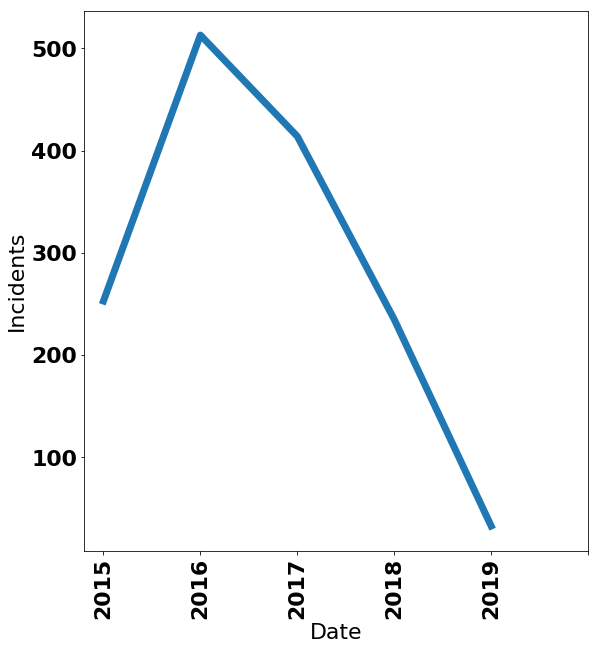

In [12]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

 
incidents = yearly_summary.groupby("Date").count()["index"]
incidents.plot.line(figsize = (10,10),linewidth=7.0)

# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Incidents')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.show()




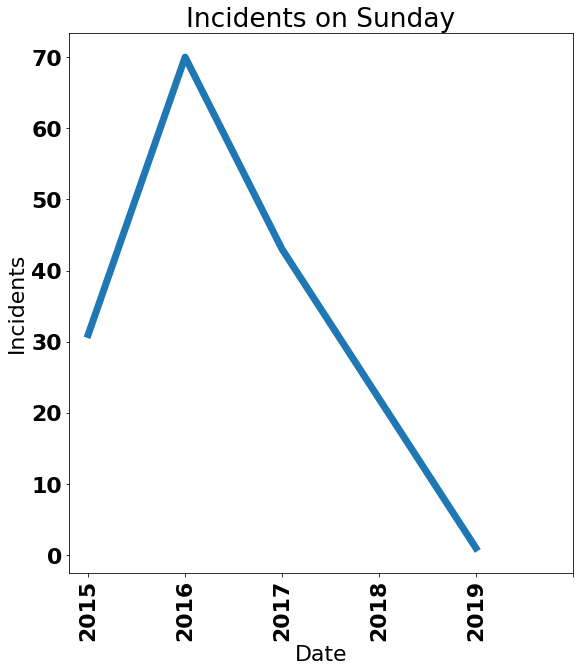

In [28]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

 
incidents = yearly_summary[yearly_summary["Weekday"] == 6].groupby("Date").count()["index"]
incidents.plot.line(figsize = (10,10),linewidth=7.0)

# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Incidents')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.title("Incidents on Sunday")
plt.show()


In [13]:
top_categories = monthly_summary.groupby("Incident Type").count().sort_values(["index"],ascending=False).head(20).index

def simple_type(x):
    if top_categories.contains(x):
        return x;
    else:
        return "Other"
    

condensed_monthly_categories = monthly_summary.copy()
condensed_monthly_categories["Incident Type"] = monthly_summary["Incident Type"].apply(simple_type)


['Other', 'Vehicle', 'Structure', 'Cooking', 'Outdoor', 'Carbon Monoxide', 'Smoke Scare', 'Electrical', 'Gas Leak', 'Trash/Rubbish', 'Hazmat', 'Appliance', 'Assist Citizen', 'Lake Rescue', 'Elevator', 'Water Leak', 'Unauthorized Burning', 'Special Rescue', 'Excessive heat/scorch', 'Odor Investigation', 'Smoking']


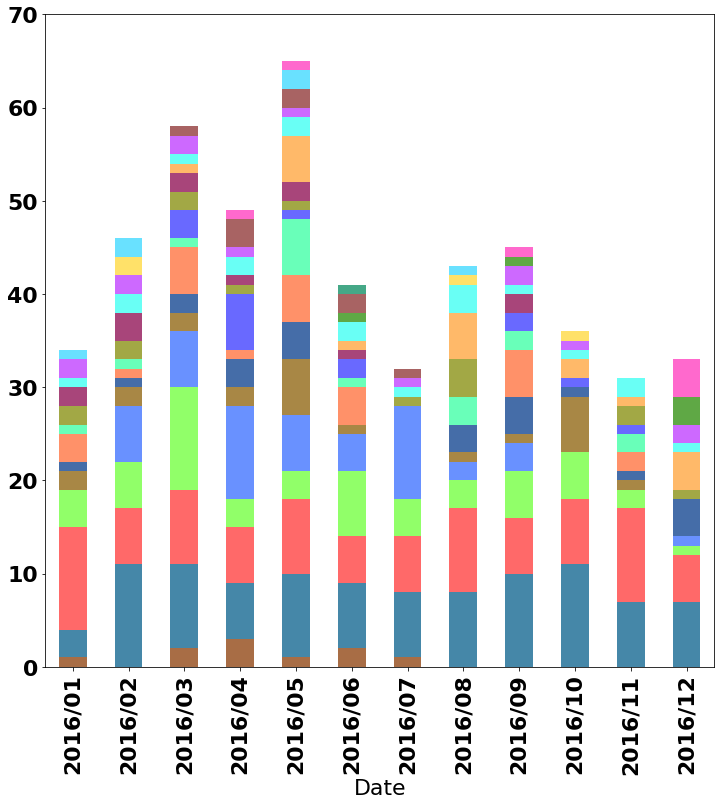

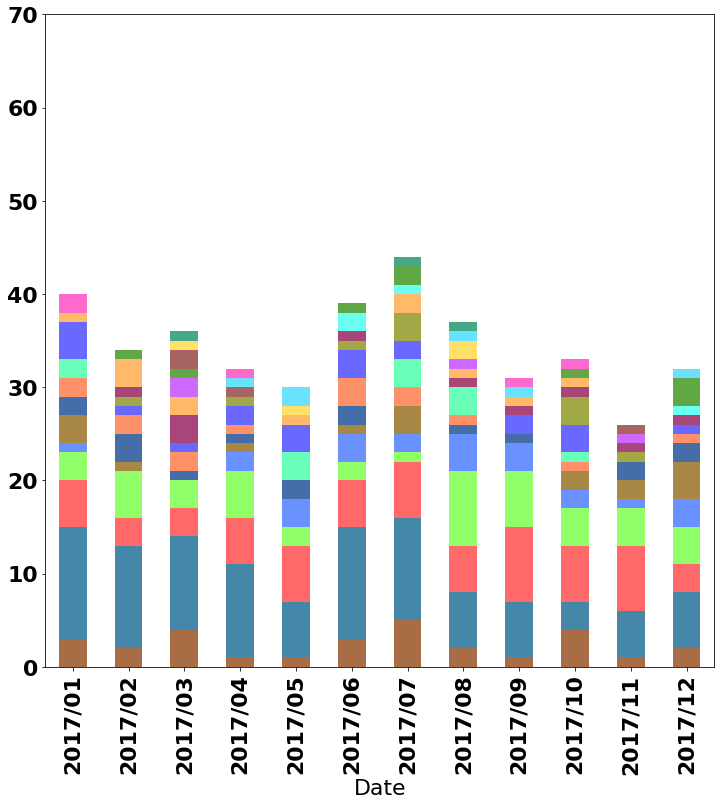

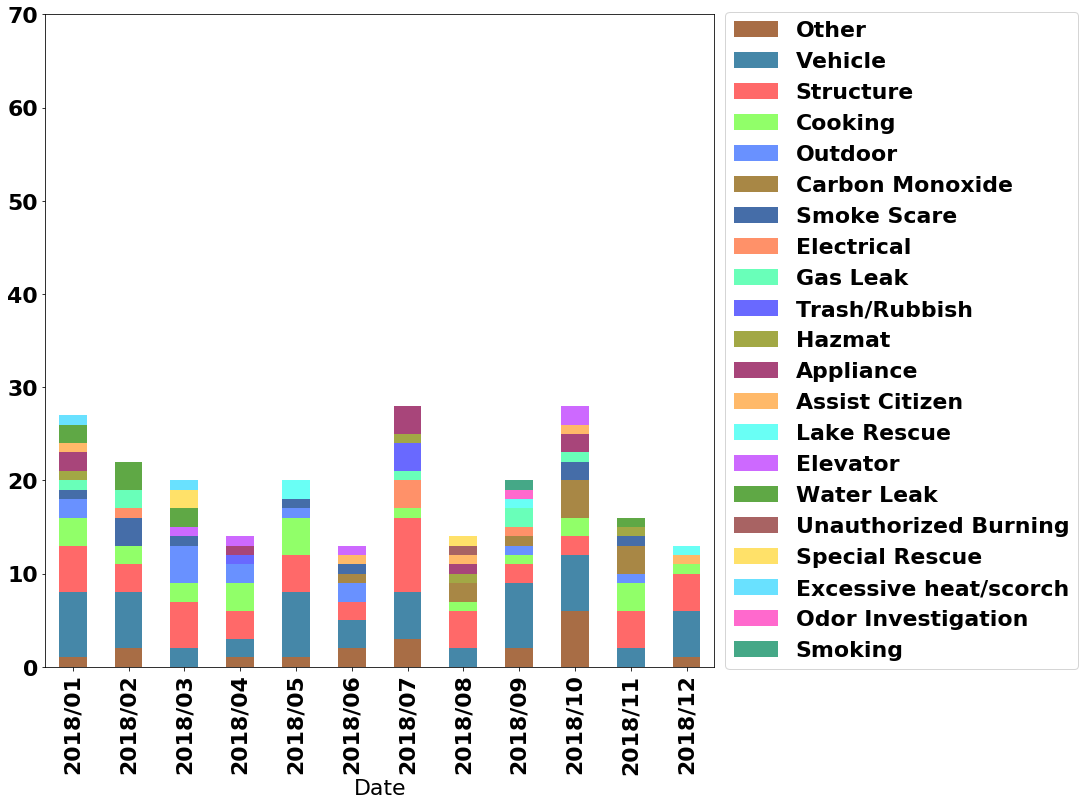

In [14]:
color_string = "#a86d45, #4587a8, #ff6969, #91ff69, #6991ff, #a88745, #456da8, #ff9169, #69ffb9, #6969ff, #a2a845, #a8457a, #ffb969, #69fff5, #cd69ff, #5fa845, #a86363, #ffe169, #69e1ff, #ff69cd, #45a887, #a07dd4, #e1ff69, #69b9ff, #ff6991"
colors = color_string.split(", ")

broken_summary = condensed_monthly_categories.groupby(['Date', 'Incident Type'])['Date'].count().unstack('Incident Type').fillna(0)
broken_bar = broken_summary[condensed_monthly_categories.groupby(["Incident Type"]).count().index.values]
#broken_bar.plot(kind='bar', stacked=True, legend = False, figsize = (12,12))

list = top_categories.tolist()
list.insert(0,"Other")
print(list)

broken_bar = broken_bar[list]

#Yearly Summaries
dates_2016 = [index for index in broken_bar.index if index.startswith('2016')]
broken_bar.loc[dates_2016].plot(kind='bar', stacked=True, figsize = (12,12), legend = False, color = colors).set_ylim(0,70)

dates_2017 = [index for index in broken_bar.index if index.startswith('2017')]
broken_bar.loc[dates_2017].plot(kind='bar', stacked=True, figsize = (12,12), legend = False, color = colors).set_ylim(0,70)

dates_2018 = [index for index in broken_bar.index if index.startswith('2018')]
broken_bar.loc[dates_2018].plot(kind='bar', stacked=True, figsize = (12,12), legend = False, color = colors).set_ylim(0,70)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))



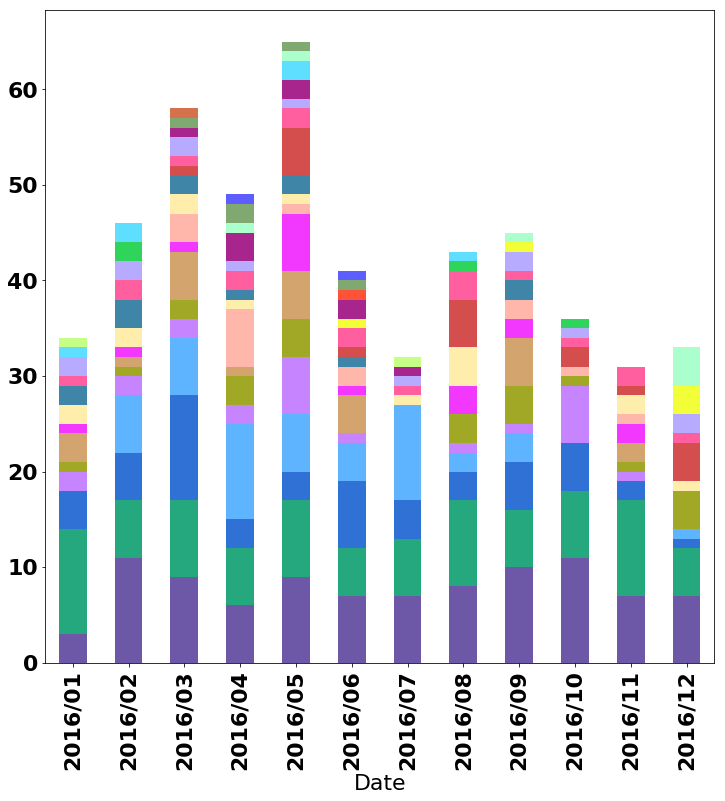

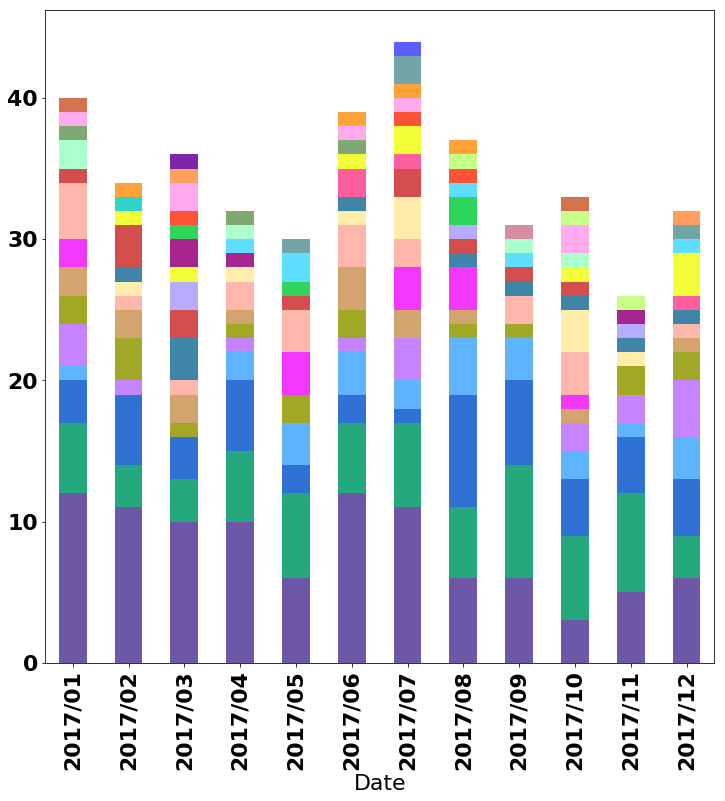

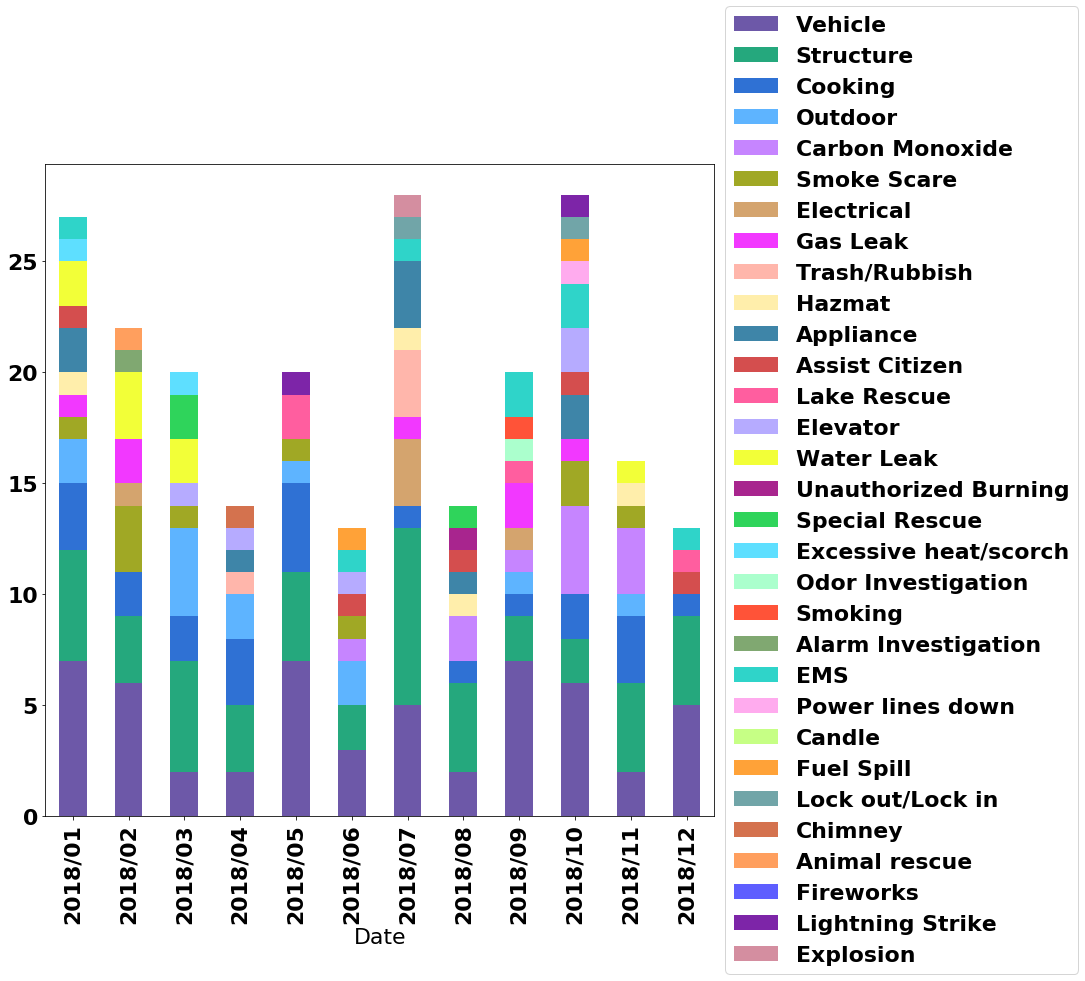

In [15]:
color_string = "#6d58a8, #25a87d, #2f71d4, #5eb4ff, #c685ff, #a0a825, #d4a46e, #f238ff, #ffb6ab, #ffeeab, #3e85a8, #d44e4e, #ff5e9f, #b6abff, #f2ff38, #a8258e, #2fd45b, #5edfff, #abffcd, #ff5338, #80a871, #2fd4c9, #ffabee, #c6ff85, #ffa238, #71a5a8, #d4724e, #ff9f5e, #5e5eff, #7d25a8, #d48ea0, #ffd738, #88ff38"
colors = color_string.split(", ")

ordered_categories = monthly_summary.groupby("Incident Type").count().sort_values(["index"],ascending=False).index.tolist()


broken_summary = monthly_summary.groupby(['Date', 'Incident Type'])['Date'].count().unstack('Incident Type').fillna(0)
broken_bar= broken_summary[monthly_summary.groupby(["Incident Type"]).count().index.values]

broken_bar = broken_bar[ordered_categories]


#Yearly Summaries
dates_2016 = [index for index in broken_bar.index if index.startswith('2016')]
broken_bar.loc[dates_2016].plot(kind='bar', legend = False, stacked=True, figsize = (12,12), color = colors)

dates_2017 = [index for index in broken_bar.index if index.startswith('2017')]
broken_bar.loc[dates_2017].plot(kind='bar', legend = False, stacked=True, figsize = (12,12), color = colors)

dates_2018 = [index for index in broken_bar.index if index.startswith('2018')]
broken_bar.loc[dates_2018].plot(kind='bar', legend = False, stacked=True, figsize = (12,12), color = colors)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

